In [3]:
#DSC501 - Drew Sweet
#now with gutenbergpy, since the text access via book id with gutenberg won't work for me
!pip install gutenbergpy
import gutenbergpy.textget
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# mount Google Drive to read and write files in colab
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH
from google.colab import drive
drive.mount('/content/drive')

# specify a data pathin within Google Drive 
data_path='/content/drive/My Drive/Colab Notebooks/data/Lab4/'

#make our data path if it doesn't exit
!/bin/mkdir -p '/content/drive/My Drive/Colab Notebooks/data/Lab4/'

Mounted at /content/drive


In [5]:
#this gets a book from Project Gutenberg 
def get_book(book_id):
    # This gets a book by its gutenberg id number
    try:
      print("Accessing Project Gutenberg to retrieve text")
      raw_book = gutenbergpy.textget.get_text_by_id(book_id) # with headers
      cleaned_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
      #changes into a string, interpreting formatting characters
      cleaned_book = cleaned_book.decode()
      raw_book = raw_book.decode()
      return cleaned_book, raw_book
    except:
      print("You did not enter a valid Project Gutenberg book id")
      


#ask the user to input text id
book_id = str(input("What is the id number of the Project Gutenberg text to find? "))
cleaned_book, raw_book = get_book(book_id)

full_or_not = str(input("Would you like the report to include the full text? [y|n] "))

#I couldn't get the info I wanted from querying the metadata database, so I used re to get it from the header
author = re.search('Author: (.*)\r\n', raw_book).group(1) #the group(1) part returns just the string, not a re.Match obj
title = re.search('Title: (.*)\r\n', raw_book).group(1)
release_date_pg = re.search('Release Date: (.*)\r\n', raw_book).group(1)
print("Author:", author)
print("Title:", title)
print("Added to Project Gutenberg:", release_date_pg)

What is the id number of the Project Gutenberg text to find? 2701
Accessing Project Gutenberg to retrieve text
Would you like the report to include the full text? [y|n] n
Author: Herman Melville
Title: Moby-Dick; or The Whale
Added to Project Gutenberg: June, 2001 [eBook #2701]


writing text file from Project Gutenberg: /content/drive/My Drive/Colab Notebooks/data/Lab4/Moby-Dick; or The Whale.txt
generating a wordcloud
preparing to store and display a wordcloud
storing wordcloud as /content/drive/My Drive/Colab Notebooks/data/Lab4/Moby-Dick; or The Whale_wordcloud_2022-11-28_at_14-51-38.png
displaying wordcloud


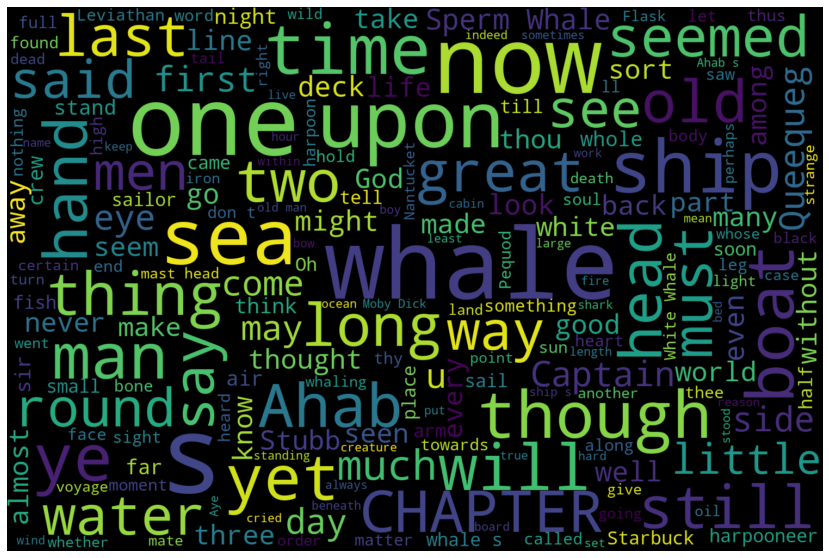

/content/drive/My Drive/Colab Notebooks/data/Lab4/Moby-Dick; or The Whale.txt
/content/drive/My Drive/Colab Notebooks/data/Lab4/Moby-Dick; or The Whale_wordcloud_2022-11-28_at_14-51-38.png


In [6]:
#now save the cleaned text and make a word cloud
#these functions adapted from P. Barello (https://colab.research.google.com/drive/1E3ujxELXEehmpIHYXcYZb7yz3ZrvSPra)
# define a function to store the retrieved text in a text file

def store_gutenberg_text(book_title, text):
    text_file = data_path+book_title+".txt"
    #I will want the filepath later, so it's global
    global text_filepath
    text_filepath = text_file
    print('writing text file from Project Gutenberg:',text_file)
    with open(text_file,"w+") as f:
      f.writelines(text)

# define a function to generate, store, and display a wordcloud from text
def wordcloud_from_text(book_title, text):

  # generate a wordcloud image
  # https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
  print('generating a wordcloud')
  cloud_text = str(text)
  wordcloud = WordCloud(
  max_font_size=200,
  width=1500, 
  height=1000,                      
  ).generate(cloud_text)

  # prepare to store and display a wordcloud
  print('preparing to store and display a wordcloud')
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")

  # store the wordcloud image as a PNG file with a name based on the current date and time of this runtime environment
  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
  timestamped_filename = data_path + book_title + '_wordcloud_' + datetime.now().strftime("%Y-%m-%d_at_%H-%M-%S") + '.png'
  print('storing wordcloud as',timestamped_filename)
  plt.savefig(timestamped_filename)
  global wordcloud_filepath
  wordcloud_filepath = timestamped_filename

  # display a wordcloud
  print('displaying wordcloud')
  plt.show()

store_gutenberg_text(title, cleaned_book)
wordcloud_from_text(title, cleaned_book)

#check to make sure I still have access to the file paths
print(text_filepath)
print(wordcloud_filepath)

In [7]:
#now try to make a PDF of my results
# create a LaTeX file to compose a PDF document 
# including figures, tables, and other forms of text or visualization
# with bibliography in IEEE format 

# host operating system prerequisites for creating PDF documents from LaTex files
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng

# python prerequisites for reading and writing PDF documents
!pip3 install PyPDF2 pdflatex

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [11]:
# compose a LaTex file
content_start = r'''\documentclass{article}
\usepackage{graphicx}
\usepackage[space]{grffile}
\usepackage{verbatim}
\usepackage{hyperref}
\begin{document}
\centering
\textbf{\huge DSC 501\\}
\vspace{0.25cm}
\textbf{Book Full Text Word Cloud Maker by Drew Sweet\\}
'''+datetime.now().strftime("%Y-%m-%d")+'''

\\vspace{0.25cm}
'''

book_info = r'''Author: ''' +author+'''\\\\\n
Title: '''+title+'''\\\\\n
Added to Project Gutenberg: '''+release_date_pg+'''\\\\\n
\\vspace{0.25cm}
This PDF created using Python and pdflatex\\\\\n
Text retrieved using gutenbergpy\\\\\n
Visualization of most common words in the text created using wordcloud\\\\\n
'''+r'Create another automated report using \url{https://colab.research.google.com/drive/15n5mE4EEJlO7VvmYpT2SUqGJbOiChdDQ}'+ '\\\\\n'

image = r'''\centerline{\includegraphics[scale=0.5]{'''+wordcloud_filepath+'''}}\n'''

citation = r'''\begin{flushleft}
    \hangindent=0.5cm ''' + "Project Gutenberg. (n.d.). Retrieved " + datetime.now().strftime("%B %d, %Y")+ ", from www.gutenberg.org.\n"+'''
\end{flushleft}
'''

full_text = '\\newpage\n'+r'''\verbatiminput{"'''+text_filepath+'''"}\n'''

content_end = r'''\end{document}
'''

if full_or_not == "y":
  content = content_start + book_info + image + citation + full_text + content_end
else:
  content = content_start + book_info + image + citation + content_end




# specify the file name without an extension so we can reuse it
outfile = 'Sweet_DSC501_CSR'
timestamped_outfile = data_path + outfile + '_' + datetime.now().strftime("%Y-%m-%d_at_%H-%M-%S")

# store a LaTex file
with open(timestamped_outfile+'.tex','w') as f:
    f.write(content)

In [12]:
#view the LaTeX file I'm trying to create for debugging
print (content)

\documentclass{article}
\usepackage{graphicx}
\usepackage[space]{grffile}
\usepackage{verbatim}
\usepackage{hyperref}
\begin{document}
\centering
\textbf{\huge DSC 501\\}
\vspace{0.25cm}
\textbf{Book Full Text Word Cloud Maker by Drew Sweet\\}
2022-11-28

\vspace{0.25cm}
Author: Herman Melville\\

Title: Moby-Dick; or The Whale\\

Added to Project Gutenberg: June, 2001 [eBook #2701]\\

\vspace{0.25cm}
This PDF created using Python and pdflatex\\

Text retrieved using gutenbergpy\\

Visualization of most common words in the text created using wordcloud\\

Create another automated report using \url{https://colab.research.google.com/drive/15n5mE4EEJlO7VvmYpT2SUqGJbOiChdDQ}\\
\centerline{\includegraphics[scale=0.5]{/content/drive/My Drive/Colab Notebooks/data/Lab4/Moby-Dick; or The Whale_wordcloud_2022-11-28_at_14-51-38.png}}
\begin{flushleft}
    \hangindent=0.5cm Project Gutenberg. (n.d.). Retrieved November 28, 2022, from www.gutenberg.org.

\end{flushleft}
\end{document}



In [13]:
### generate a PDF document from a LaTex file
## https://pypi.org/project/pdflatex/
import pdflatex

# read a LaTex file
infile = timestamped_outfile
pdfl = pdflatex.PDFLaTeX.from_texfile(infile+'.tex')

# generate and store a PDF document
pdf, log, completed_process = pdfl.create_pdf(keep_pdf_file=True, keep_log_file=True)
with open(infile+'.pdf', 'wb') as pdfout:
        pdfout.write(pdf)